## **This *'ipynb'* file shows the data visualizations of US Presidential Elections in 2020 by state.**

In [ ]:
# connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/US Elections 2020

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/US Elections 2020


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/US Elections 2020/1976-2020-US president elections.csv")

In [ ]:
# Filter election_results for the year 2020
data = data[data['year'] == 2020]

data.to_csv('election_data_2020.csv', index=False)

In [ ]:
# Reload the dataset
df = pd.read_csv('/content/drive/MyDrive/US Elections 2020/election_data_2020.csv')

# Filling 'notes' column with 'NA'in the new election_data_2020.csv file as this file doesn't have notes column filled.
if 'notes' in df.columns:
    df['notes'] = df['notes'].fillna('NA')

# Save the updated file
updated_file_path_corrected = '/content/drive/MyDrive/US Elections 2020/election_data_2020_updated.csv'
df.to_csv(updated_file_path_corrected, index=False)
updated_file_path_corrected


'/content/drive/MyDrive/US Elections 2020/election_data_2020_updated.csv'

In [ ]:
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3740,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,849624,2323282,20210113,NaN,DEMOCRAT
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN
3742,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,25176,2323282,20210113,NaN,LIBERTARIAN
3743,2020,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,7312,2323282,20210113,NaN,OTHER
3744,2020,ALASKA,AK,2,94,81,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,153778,359530,20210113,NaN,DEMOCRAT


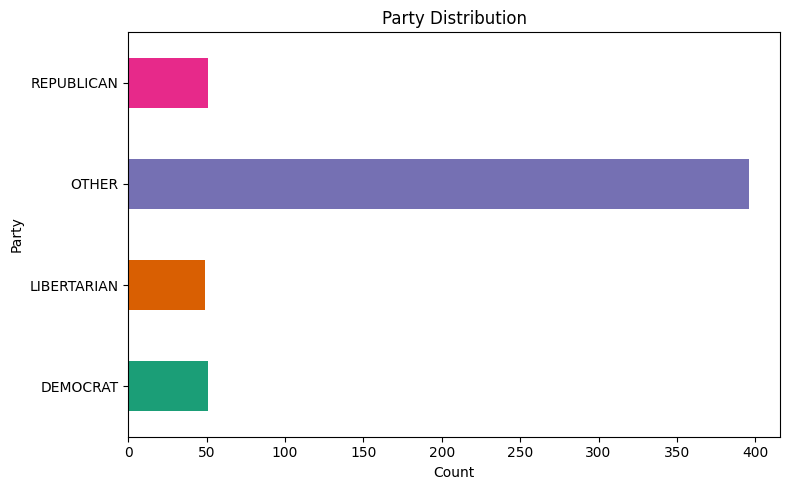

In [ ]:
# horizontal bar plot showing distribution of members in each party
palette = sns.color_palette('Dark2')
ax = data.groupby('party_simplified').size().plot(
    kind='barh',
    color=palette,
    figsize=(8, 5)
)

ax.set_title('Party Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Party')
plt.tight_layout()
plt.show()


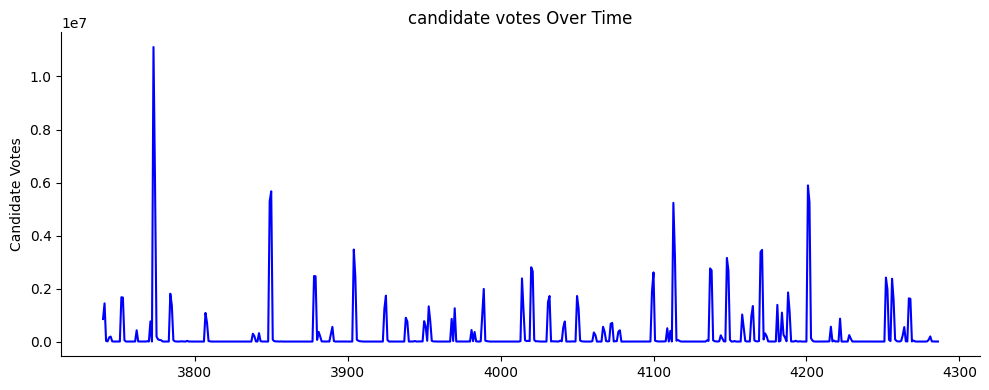

In [ ]:
# graph showing the candidate votes
ax = data['candidatevotes'].plot(kind='line', figsize=(10, 4), title='candidate votes', color='blue')
ax.set_ylabel('Candidate Votes')
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('candidate votes Over Time')
plt.tight_layout()
plt.show()

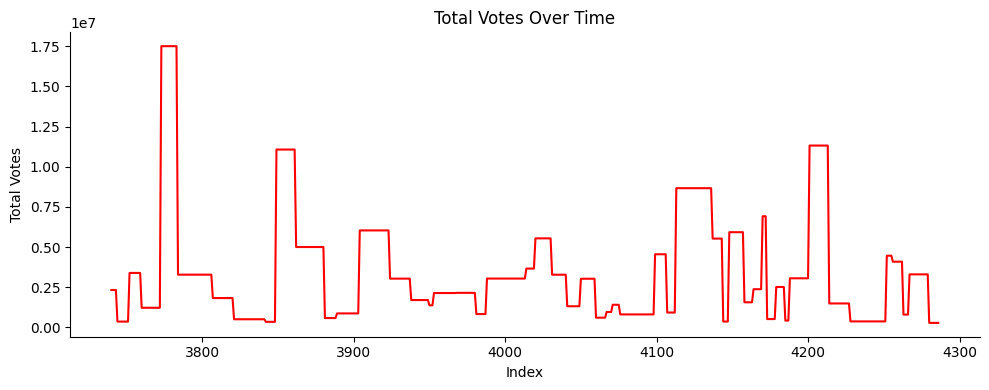

In [ ]:
# graph showing total votes
ax = data['totalvotes'].plot(kind='line', figsize=(10, 4), title='total votes', color='red' )
ax.set_xlabel('Index')
ax.set_ylabel('Total Votes')
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Total Votes Over Time')
plt.tight_layout()
plt.show()

<ipython-input-73-19791a21e830>:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = plt.scatter(


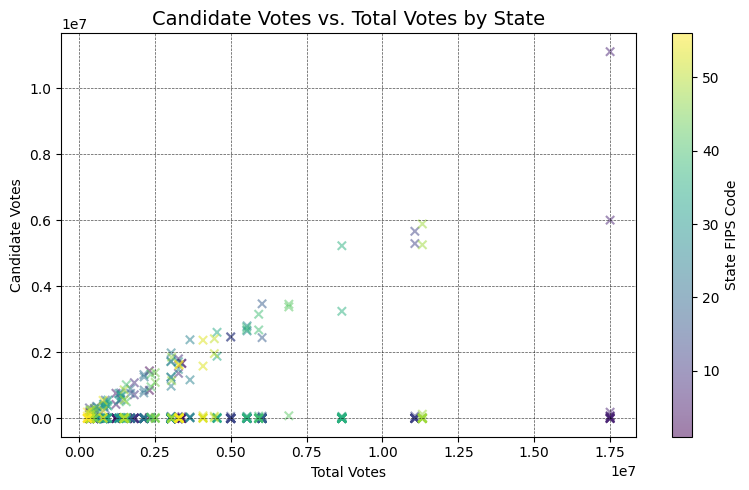

In [ ]:
# scatter plot showing candidate votes vs total votes by state
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    data['totalvotes'],
    data['candidatevotes'],
    c=data['state_fips'],
    cmap='viridis',
    marker='x',
    alpha=0.5,
    edgecolor='k'
)

plt.xlabel('Total Votes')
plt.ylabel('Candidate Votes')
plt.title('Candidate Votes vs. Total Votes by State', fontsize=14)
plt.colorbar(scatter, label='State FIPS Code')
plt.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-80-0c355caf30e6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-80-0c355caf30e6>:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(


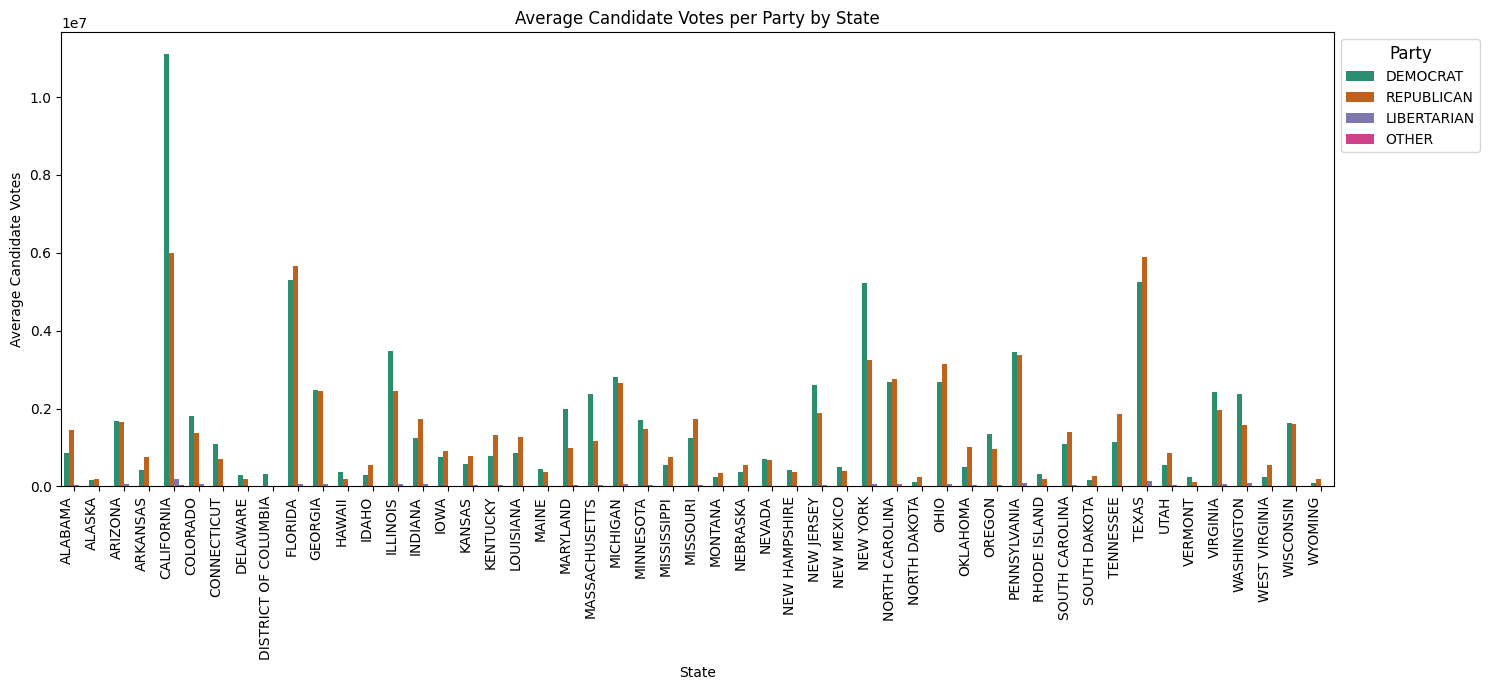

In [ ]:
# Bar plot showing the Average Candidate Votes per Party by State
palette = sns.color_palette('Dark2')

plt.figure(figsize=(15, 7))
sns.barplot(
    x='state',
    y='candidatevotes',
    hue='party_simplified',
    data=data,
    ci=None,
    palette=palette
)

plt.xticks(rotation=90, fontsize=10, ha='right')
plt.xlabel('State')
plt.ylabel('Average Candidate Votes')
plt.title('Average Candidate Votes per Party by State')
plt.legend(title='Party', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

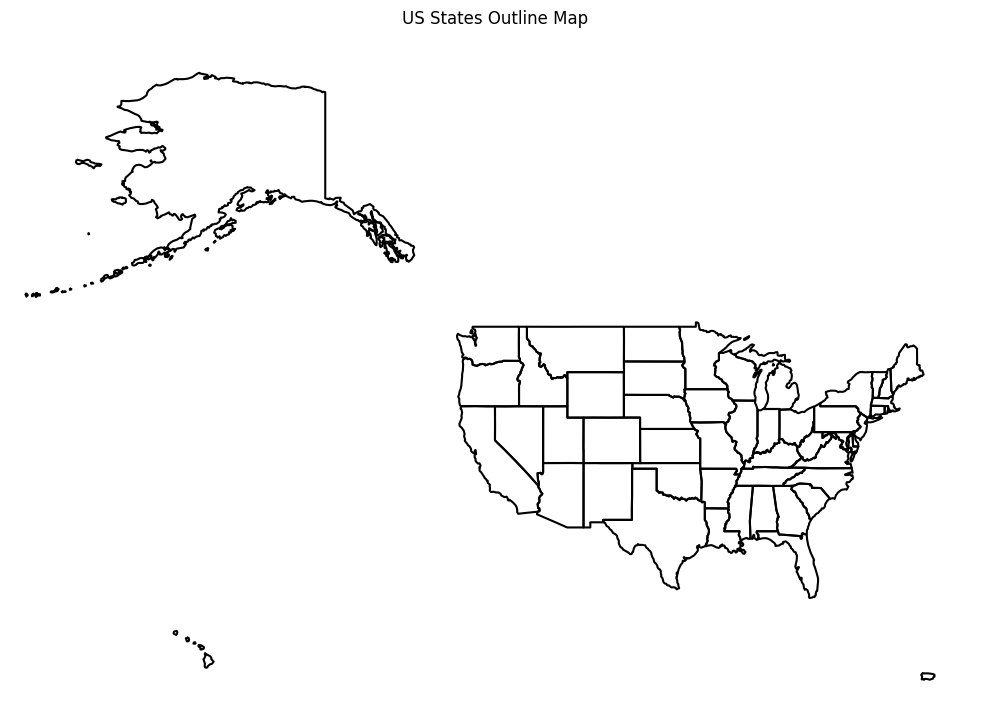

In [ ]:
# Load a GeoJSON file directly from the URL
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
us_states = gpd.read_file(url)

# Separate Alaska and Hawaii
mainland = us_states[~us_states['id'].isin(['02', '15'])]  # Exclude Alaska (02) and Hawaii (15)
alaska = us_states[us_states['id'] == '02']
hawaii = us_states[us_states['id'] == '15']

# projecting Alaska and Hawaii
alaska = alaska.translate(xoff=-35, yoff=-15)
hawaii = hawaii.translate(xoff=60, yoff=-20)

fig, ax = plt.subplots(figsize=(10, 8))
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
us_states.boundary.plot(ax=ax, color='black')

ax.set_xlim([-180, -60])
ax.set_ylim([15, 75])
ax.set_title("US States Outline Map")
ax.axis('off')
plt.tight_layout()
plt.show()

### US map depicting the Winning party in each state in the Presidential Elections 2020.

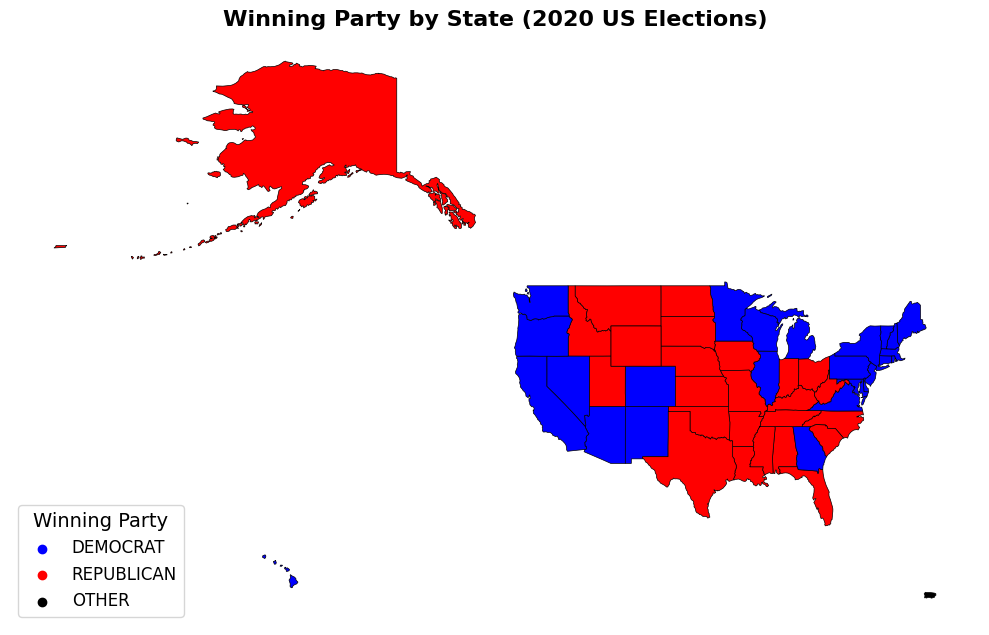

In [ ]:
# Load GeoJSON file for US states
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
us_states = gpd.read_file(url)

# Convert to integer if not already
data['state_fips'] = data['state_fips'].astype(int)

state_party_votes = data.groupby(['state_fips', 'party_simplified'])['candidatevotes'].sum().reset_index()

winning_party = state_party_votes.loc[state_party_votes.groupby('state_fips')['candidatevotes'].idxmax()]
winning_party = winning_party[['state_fips', 'party_simplified']]


us_states['id'] = us_states['id'].astype(int)

# Merge the winning party data with the US shapefile using state_fips
merged = us_states.merge(winning_party, left_on='id', right_on='state_fips', how='left')

# color mapping for winning parties
party_colors = {
    'DEMOCRAT': 'blue',
    'REPUBLICAN': 'red',
    'OTHER': 'black'
}

merged['party_simplified'] = merged['party_simplified'].fillna('OTHER')
merged['color'] = merged['party_simplified'].map(party_colors)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged.plot(
    color=merged['color'],
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# Customize the plot
ax.set_title('Winning Party by State (2020 US Elections)', fontsize=16, weight='bold')
ax.axis('off')

for label, color in party_colors.items():
    ax.scatter([], [], color=color, label=label)
ax.legend(title='Winning Party', loc='lower left', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# number of states won by each party including Washington DC
party_counts = winning_party['party_simplified'].value_counts()
print(party_counts)

party_simplified
DEMOCRAT      26
REPUBLICAN    25
Name: count, dtype: int64


In [83]:
# Debugging it to Check the color mapping
print(merged[['id', 'party_simplified', 'color']].head())

   id party_simplified color
0   1       REPUBLICAN   red
1   2       REPUBLICAN   red
2   4         DEMOCRAT  blue
3   5       REPUBLICAN   red
4   6         DEMOCRAT  blue


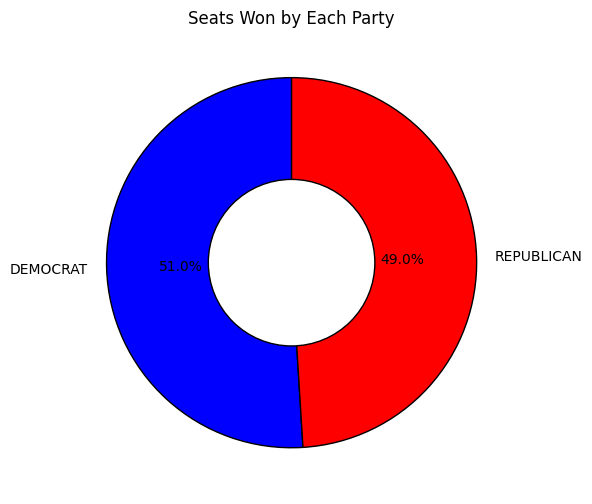

In [ ]:
# Donut chart showing the percentage of seats won by each party
plt.figure(figsize=(6, 6))
colors = ['blue', 'red', 'black']

# Plot the pie chart using the value counts
party_counts.plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    labels=party_counts.index,
    wedgeprops={'edgecolor': 'black'}
)

# donut effect
centre_circle = plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gca().add_artist(centre_circle)
plt.title('Seats Won by Each Party')
plt.ylabel('')
plt.tight_layout()
plt.show()